In [1]:
from tensorflow.keras.datasets.mnist import load_data
#((x_train,y_train),(x_test,y_test))
(x_train,y_train),(x_test,y_test)=load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


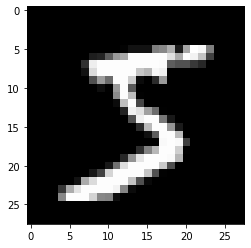

In [4]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap="gray")

In [5]:
# 20200706 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # 全連接
layers =[
         # 784 * 128 + 128(bias)
         Dense(128,activation="relu", input_dim=784),
         # 128 * 10 + 10(bias)
         Dense(10,activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 分類問題: 交叉熵
# 熵: p * log(1/p) -> gini : p * (1-p) 
# 交叉熵: 
# categorical(多元)[softmax]: p1 * log(1/q1) + p2 *log(1/q2)......
# binary(一個神經元)[sigmoid:0-1] : p * log(1/q) +(1-p) * log(1/(1-q))

from tensorflow.keras.losses import CategoricalCrossentropy # 交叉熵
model.compile(loss=CategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [7]:
# x_train.reshape(60000, 784).shape
# x_train.reshape(-1, 784).shape # 自己算

In [8]:
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# validation_split: 留下一些訓練資料來看模型好不好
# batch_size: 看多少筆做一次平均梯度
# epochs : 整份資料看幾遍
# verbose: log的詳細程度[1:]
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
     ModelCheckpoint("mlp.h5",save_best_only=True),
     EarlyStopping(patience=3, restore_best_weights=True)
]
model.fit(x_train_norm,
          y_train_cat,
          validation_split=0.1,
          batch_size=200,
          epochs=50,
          verbose=2,
          callbacks=c)

Epoch 1/50
270/270 - 1s - loss: 0.4317 - accuracy: 0.8826 - val_loss: 0.1959 - val_accuracy: 0.9497
Epoch 2/50
270/270 - 1s - loss: 0.2023 - accuracy: 0.9432 - val_loss: 0.1456 - val_accuracy: 0.9598
Epoch 3/50
270/270 - 1s - loss: 0.1491 - accuracy: 0.9575 - val_loss: 0.1183 - val_accuracy: 0.9650
Epoch 4/50
270/270 - 1s - loss: 0.1171 - accuracy: 0.9667 - val_loss: 0.1040 - val_accuracy: 0.9730
Epoch 5/50
270/270 - 1s - loss: 0.0954 - accuracy: 0.9728 - val_loss: 0.0940 - val_accuracy: 0.9733
Epoch 6/50
270/270 - 1s - loss: 0.0801 - accuracy: 0.9766 - val_loss: 0.0893 - val_accuracy: 0.9750
Epoch 7/50
270/270 - 1s - loss: 0.0689 - accuracy: 0.9801 - val_loss: 0.0829 - val_accuracy: 0.9760
Epoch 8/50
270/270 - 1s - loss: 0.0596 - accuracy: 0.9832 - val_loss: 0.0800 - val_accuracy: 0.9767
Epoch 9/50
270/270 - 1s - loss: 0.0523 - accuracy: 0.9853 - val_loss: 0.0816 - val_accuracy: 0.9755
Epoch 10/50
270/270 - 1s - loss: 0.0451 - accuracy: 0.9874 - val_loss: 0.0767 - val_accuracy: 0.9772

In [23]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 0.9775


[0.0723959282040596, 0.9775000214576721]

In [11]:
from sklearn.metrics import confusion_matrix
# predict:原本 predict_proba
# predict_classes: 原本 predict
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame( mat, 
             columns = ["{}(預測值)".format(1) for i in range(10)],
             index = ["{}(正確值)".format(1) for i in range(10)]    
)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,1(預測值),1(預測值),1(預測值),1(預測值),1(預測值),1(預測值),1(預測值),1(預測值),1(預測值),1(預測值)
1(正確值),969,0,0,1,1,1,2,1,2,3
1(正確值),0,1124,3,0,0,1,2,1,4,0
1(正確值),4,3,1007,1,1,1,2,4,8,1
1(正確值),0,0,4,984,0,5,0,4,8,5
1(正確值),1,0,2,0,957,0,3,4,2,13
1(正確值),2,0,0,5,1,870,3,2,6,3
1(正確值),3,3,4,1,4,7,935,0,1,0
1(正確值),1,3,6,3,0,1,0,1006,2,6
1(正確值),5,0,3,2,5,5,1,4,944,5
1(正確值),2,3,0,6,8,1,1,6,3,979


In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
pre

array([7, 2, 1, ..., 4, 5, 6])

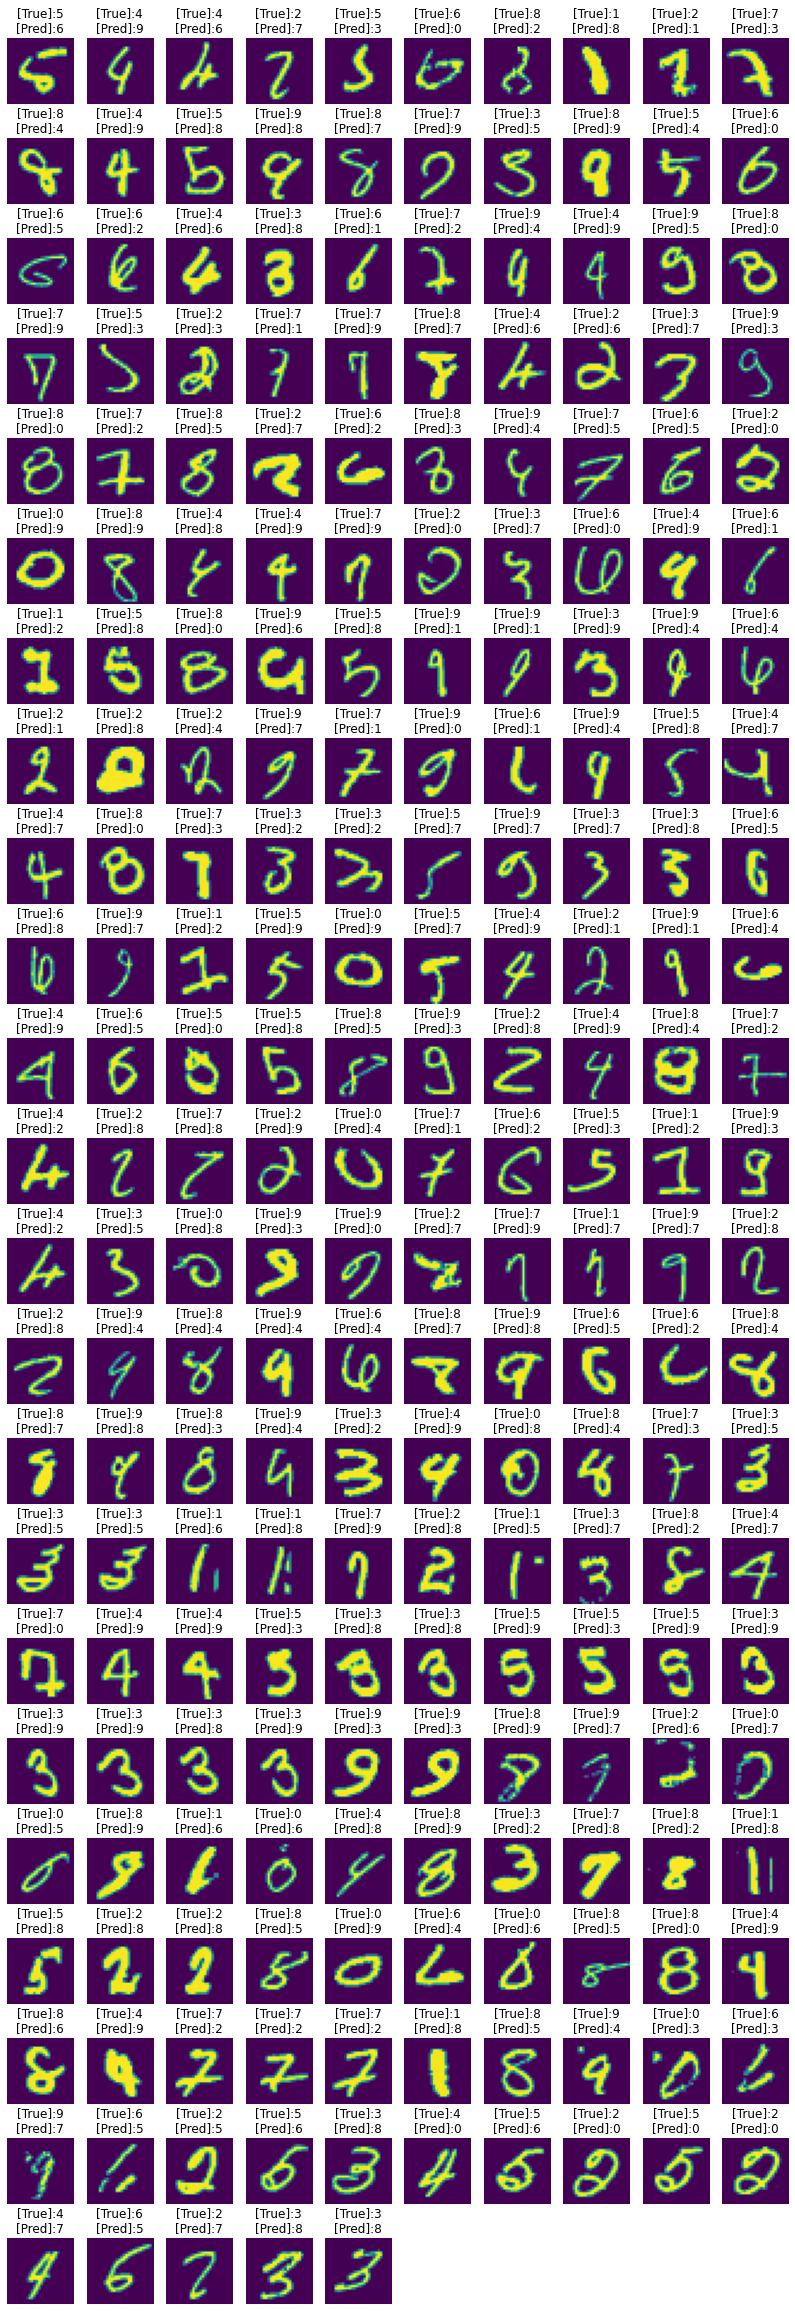

In [22]:
import numpy as np
# 抓出非0的位置
idx = np.nonzero(pre != y_test)[0]
false_label = y_test[idx]  
false_pred = pre[idx] # 預測錯誤的正確答案
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx)  // width +1 # 取商, +1 多一列取餘數
for i, img in enumerate(false_img) :
  plt.subplot(height, width, i+1)
  t = "[True]:{}\n[Pred]:{}".format(false_label[i],
                                    false_pred[i])
  plt.title(t)
  plt.axis("off")
  plt.imshow(img)

檔名:test.png
答案是: 3
機率: [2.7562678e-03 5.7566969e-05 1.1471134e-02 9.8230767e-01 1.3575799e-07
 2.9312840e-04 2.1847611e-06 1.3292395e-04 1.3845176e-03 1.5945110e-03]


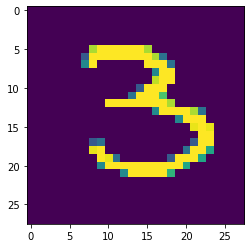

In [36]:
# 儲存: model.save("xxx.h5")
# 載入: compile(x) fit/predict(o)
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img

model_load = load_model("mlp.h5")
# model.evaluate(x_test_norm, y_test_cat)
fp = input("檔名:")
img = load_img(fp, target_size=(28, 28)).convert("L")
img_np = np.array(img)
img_norm = img_np.reshape(1, 784) / 255
answer = model.predict_classes(img_norm)[0]
proba = model.predict(img_norm)[0]
print("答案是:",answer)
print("機率:",proba)
plt.imshow(img_np)